把二维数据编程一维，只使用了numpy,没有引入sklearn中的PCA方法。
代码来源：

In [3]:
import numpy as np
import matplotlib.pyplot as plt

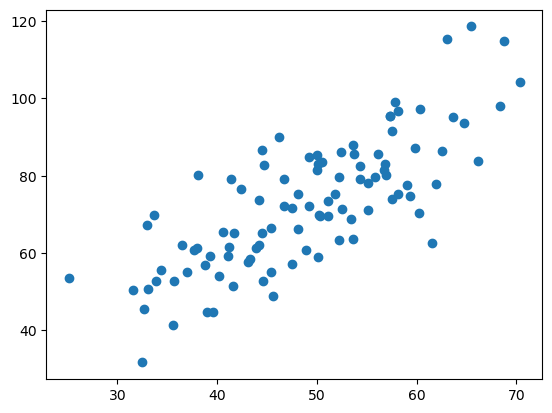

(100,)


In [4]:
#载入数据
data=np.genfromtxt("data.csv",delimiter=",")
#使用NumPy的genfromtxt函数读取名为data.csv的文件，
#delimiter=","指定了数据的分隔符为逗号。
#返回的data是一个数组，包含CSV文件中的所有数据。
x_data=data[:,0]
#提取data数组中的第一列，赋值给x_data
y_data=data[:,1]
#提取data数组中的第二列，赋值给y_data
plt.scatter(x_data,y_data)
plt.show()
print(x_data.shape)

In [5]:
#数据中心化
def zeroMean(dataMat):
    #按列求平均，即各个特征平均
    meanVal=np.mean(dataMat,axis=0)
    #使用 NumPy 的 mean 函数计算 dataMat 每一列的均值（即每个特征的均值）。
    #axis=0 表示沿着列的方向计算均值。
    newData=dataMat-meanVal
    return newData,meanVal

In [6]:
newData,meanVal=zeroMean(data)
#np.cov用于求协方差矩阵
#rowvar=0参数表示每一列代表一个变量（特征），每一行代表一个观测值
covMat=np.cov(newData,rowvar=0)

In [7]:
covMat#协方差矩阵

array([[ 94.99190951, 125.62024804],
       [125.62024804, 277.49520751]])

In [8]:
#np.linalg.eig求矩阵的特征值和特征向量
eigVals,eigVects=np.linalg.eig(np.mat(covMat))

In [9]:
#特征值
eigVals

array([ 30.97826888, 341.50884814])

In [10]:
#特征向量
eigVects

matrix([[-0.89098665, -0.45402951],
        [ 0.45402951, -0.89098665]])

In [11]:
#对特征值从小到大排序
eigValIndice=np.argsort(eigVals)

In [13]:
top=1
#最大的top个特征值的下标
n_eigValIndice=eigValIndice[-1:-(top+1):-1]
#-1表示从最后一个元素开始提取。
#-(top+1)表示提取的结束位置，通常top是希望保留的特征数。
#-1表示步长为-1，意味着反向提取元素

In [15]:
#最大的top个特征值对应的特征向量
n_eigVect=eigVects[:,n_eigValIndice]
n_eigVect

matrix([[-0.45402951],
        [-0.89098665]])

In [16]:
#将中心化后的数据投影到低维空间
lowDDataMat=newData*n_eigVect
#lowDDataMat

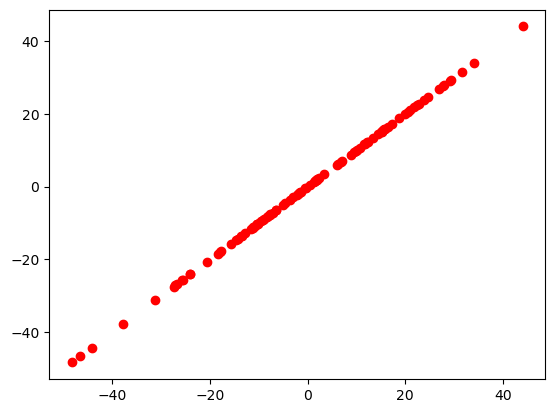

In [17]:
x_data=np.array(lowDDataMat)[:,0]
y_data=np.array(lowDDataMat)[:,0]
plt.scatter(x_data,y_data,c='r')
plt.show()

In [18]:
#利用低维度数据来重构数据，重构是为了比较与原始数据之间的差异
reconMat=(lowDDataMat*n_eigVect.T)+meanVal
#reconMat

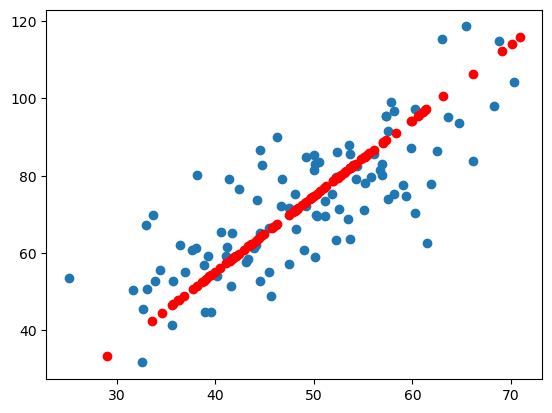

In [19]:
#载入数据
data=np.genfromtxt("data.csv",delimiter=",")
x_data=data[:,0]
y_data=data[:,1]
plt.scatter(x_data,y_data)
#重构的数据
x_data=np.array(reconMat)[:,0]
y_data=np.array(reconMat)[:,1]
plt.scatter(x_data,y_data,c='r')
plt.show()

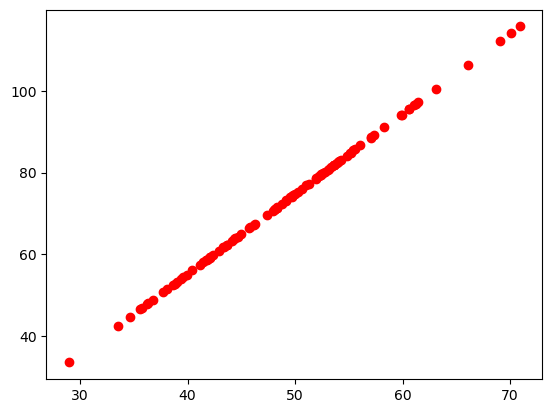

In [20]:
#重构的数据
x_data=np.array(reconMat)[:,0]
y_data=np.array(reconMat)[:,1]
plt.scatter(x_data,y_data,c='r')
plt.show()